## Swiggy Restaurants Data Analysis

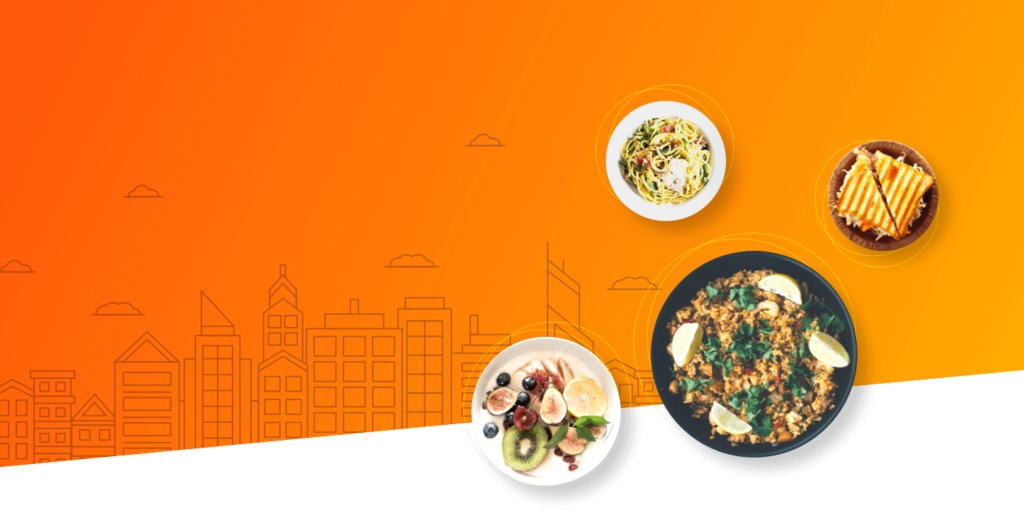

**Importing necessary Libraries**

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')
print("Setup Comp")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup Comp


# Data Collection
Getting started with Data Gathering and Investigation.

Load the json dataset first.

In [2]:
f = open('/content/drive/MyDrive/data.json','r')
data = f.read()
f.close()

returns JSON object as a dictionary

In [3]:
data =json.loads(data)

In [4]:
type(data)

dict

# Data Preparation
In this Section we are going to explore the json file, which was loaded above and returns as a dictonary.

In [5]:
data.keys()

dict_keys(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Almora', 'Alwar', 'Amalapuram', 'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar', 'Anand', 'Anantapur', 'Angul', 'Ankleshwar', 'Arakkonam', 'Arambagh', 'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad', 'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra', 'Bagula', 'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore', 'Ballari', 'Balrampur', 'Balurghat', 'Banda', 'Bangalore', 'Bankabihar', 'Bankura', 'Bantwal', 'Bapatlachirala', 'Baramati', 'Baran', 'Baraut', 'Bardhaman', 'Bardoli', 'Bareilly', 'Baripada', 'Barmer', 'Barnala', 'Barshi', 'Barwani', 'Basirhat', 'Basti', 'Batala', 'Bathinda', 'Beawar', 'Beed', 'Begusarai', 'Bela-pratapgarh', 'Belgaum', 'Berhampore', 'Berhampur', 'Bettiah', 'Betul', 'Bhadohi', 'Bhadrachalam', 'Bhadrak', 'Bhadravati', 'Bhagalpur', 'Bhandara', 

In [6]:
Cities = list(data.keys())
print('There are ',len(Cities),'cities in india according to the listed name on given dataset')

There are  623 cities in india according to the listed name on given dataset


In [7]:
data['Abohar']

{'link': 'https://www.swiggy.com/city/abohar',
 'restaurants': {'567335': {'name': 'AB FOODS POINT',
   'rating': '--',
   'rating_count': 'Too Few Ratings',
   'cost': '₹ 200',
   'address': 'AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINIC , NEAR IDBI BANK, ABOHAR',
   'cuisine': 'Beverages,Pizzas',
   'lic_no': '22122652000138',
   'menu': {'Burger': {'Aloo Tikki Burger': {'price': '40',
      'veg_or_non_veg': 'Veg'},
     'Veg Creamy Burger': {'price': '50', 'veg_or_non_veg': 'Veg'},
     'Cheese Burst Burger': {'price': '65', 'veg_or_non_veg': 'Veg'},
     'Paneer Creamy Burger': {'price': '80', 'veg_or_non_veg': 'Veg'},
     'Maxican Burger': {'price': '80', 'veg_or_non_veg': 'Veg'},
     'Bbq Chicken Burger': {'price': '105', 'veg_or_non_veg': 'Non-veg'},
     'Peri Peri Chicken Burger': {'price': '105',
      'veg_or_non_veg': 'Non-veg'}},
    'Pasta Must Try': {'White Sauce': {'price': '100',
      'veg_or_non_veg': 'Veg'},
     'Red Sauce': {'price': '100', 'veg_or_non_veg': 

Exploring the json dataset structure.

In [8]:
c = Cities[0]
print('City Name :',c)

print('Link :', data[c]['link'])
id = list(data[c]['restaurants'].keys())
id = list(data[c]['restaurants'].keys())
id[0]
print('First restaurant id :',id[0])
print('First restaurant name :',data[c]['restaurants'][id[0]]['name'])
print('First restaurant Rating :',data[c]['restaurants'][id[0]]['rating'])
print('First restaurant Rating_counts :',data[c]['restaurants'][id[0]]['rating_count'])
print('First restaurant Cost :',data[c]['restaurants'][id[0]]['cost'])
print('First restaurant Address :',data[c]['restaurants'][id[0]]['address'])
print('First restaurant Cuisine :',data[c]['restaurants'][id[0]]['cuisine'])
print('First restaurant Lic_no :',data[c]['restaurants'][id[0]]['lic_no'])
print('First restaurant Menu :',data[c]['restaurants'][id[0]]['menu'])
Menu = list(data[c]['restaurants'][id[0]]['menu'].keys())
print('------Menu------')
for item in Menu:
  print(item)
  sub_menu = list(data[c]['restaurants'][id[0]]['menu'][item].keys())
  for sub_item in sub_menu :
    print(sub_item,'Price:',data[c]['restaurants'][id[0]]['menu'][item][sub_item]['price'],end ='| ')
    print('veg_or_non_veg: ' ,data[c]['restaurants'][id[0]]['menu'][item][sub_item]['veg_or_non_veg'])
    print('-------Submenu---------')
    print('      ')


print('First Restaurants Link: ',data[c]['restaurants'][id[0]]['link'])

City Name : Abohar
Link : https://www.swiggy.com/city/abohar
First restaurant id : 567335
First restaurant name : AB FOODS POINT
First restaurant Rating : --
First restaurant Rating_counts : Too Few Ratings
First restaurant Cost : ₹ 200
First restaurant Address : AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINIC , NEAR IDBI BANK, ABOHAR
First restaurant Cuisine : Beverages,Pizzas
First restaurant Lic_no : 22122652000138
First restaurant Menu : {'Burger': {'Aloo Tikki Burger': {'price': '40', 'veg_or_non_veg': 'Veg'}, 'Veg Creamy Burger': {'price': '50', 'veg_or_non_veg': 'Veg'}, 'Cheese Burst Burger': {'price': '65', 'veg_or_non_veg': 'Veg'}, 'Paneer Creamy Burger': {'price': '80', 'veg_or_non_veg': 'Veg'}, 'Maxican Burger': {'price': '80', 'veg_or_non_veg': 'Veg'}, 'Bbq Chicken Burger': {'price': '105', 'veg_or_non_veg': 'Non-veg'}, 'Peri Peri Chicken Burger': {'price': '105', 'veg_or_non_veg': 'Non-veg'}}, 'Pasta Must Try': {'White Sauce': {'price': '100', 'veg_or_non_veg': 'Veg'}, 'Re

Create DataFrame from Dictionary

In [9]:
Data = pd.DataFrame()

for city in Cities:
    try:

        DF = pd.DataFrame(data[city]['restaurants']).T


        City = [city for i in range(DF.shape[0])]
        DF['City'] = City


        SubRegion = City
        DF['SubRegion'] = SubRegion


        Data = pd.concat([Data,DF])

    except:

        Subregions = list(data[city].keys())
        for region in Subregions:


            DF = pd.DataFrame(data[city][region]['restaurants']).T


            City = [city for i in range(DF.shape[0])]

            DF['City'] = City


            SubRegion = [region for i in range(DF.shape[0])]

            #
            DF['SubRegion'] = SubRegion
            Data = pd.concat([Data,DF])

Data.shape


(181404, 13)

Creating Menu Column

In [10]:
def Menu(Data, i):
    Menu = list(Data.menu[i].keys())
    print(Data['name'][i],',',Data['SubRegion'][i],Data['City'][i],'- Menu',)
    print('---------')
    print('   ')

    for item in Menu:
        print(item)
        Sub_menu = list(Data.menu[i][item].keys())
        for sub_item in Sub_menu :
            print(sub_item,'Price :',Data.menu[i][item][sub_item]['price'], end = '| ')
            print('veg_or_non_veg :',Data.menu[i][item][sub_item]['veg_or_non_veg'])
        print('-'*50)

Menu(Data, 900)

ROYAL ROLLS , Agra Agra - Menu
---------
   
Pav Bhaji
Pav Bhaji (2 Pcs) Price : 90| veg_or_non_veg : Veg
--------------------------------------------------
Vada Pav Mumbaiya Style
Makhni Vada Pav Price : 75| veg_or_non_veg : Veg
Tandoori Vada Pav Price : 80| veg_or_non_veg : Veg
Royal Vada Pav Price : 70| veg_or_non_veg : Veg
--------------------------------------------------
Veg Burgers
Noodel Veg Burger Price : 80| veg_or_non_veg : Veg
Aloo Tikki Burger Price : 60| veg_or_non_veg : Veg
Aloo Tikki Cheese Burger Price : 70| veg_or_non_veg : Veg
Veg Burger Price : 70| veg_or_non_veg : Veg
Veg Cheese Burger Price : 89| veg_or_non_veg : Veg
Veg Surprise Burger Price : 82| veg_or_non_veg : Veg
Royal Veg Burger Price : 99| veg_or_non_veg : Veg
Paneer Burger Price : 100| veg_or_non_veg : Veg
Double Royal Burger Price : 115| veg_or_non_veg : Veg
--------------------------------------------------
Veg Rolls
Veg Tikka Royal Roll Price : 99| veg_or_non_veg : Veg
Aloo Masala Roll Price : 60| veg_

Save DataFrame into csv file

In [11]:
Data.to_csv('SwiggyData.csv')


Read the saved DataFrame for analysis

In [12]:
df = pd.read_csv('SwiggyData.csv')

In [13]:
df.head(2)

,Unnamed: 0,name,rating,rating_count,cost,address,cuisine,lic_no,menu,link,City,SubRegion,type,price
0,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...,Abohar,Abohar,NaN,NaN
1,531342,Janta Sweet House,4.4,50+ ratings,₹ 200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",12117201000112,{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...,Abohar,Abohar,NaN,NaN


# Data Cleaning

Rearranging menu column

In [15]:
menus = []
for i in range(Data.shape[0]):
    try:
        menus.append(', '.join([key for key in Data.menu[i].keys()]))
    except:
        menus.append(np.NaN)
print(len(menus))
print(df.shape[0])

df['menu'] = menus

181404
181404


Checking rows if they have any duplicates.

It is necessary to eliminate any type of duplication from the table, duplicate entry of rows can directly effect our analysis.

In [14]:
df1 = df.rename(columns={'Unnamed: 0':'id', 'name':'Restaurant'})
df1.drop_duplicates(subset='id', keep='first', inplace = True)

df1.shape

(160621, 14)

In [31]:
Null = df1.isnull().sum().reset_index().rename({0 : 'Null'},axis = 1)
Null['% Null'] = round((Null['Null']/df3.shape[0])*100, 0)
Null.style.background_gradient()

,index,Null,% Null
0,id,0,0.000000
1,Restaurant,101,0.000000
2,rating,101,0.000000
3,rating_count,12132,8.000000
4,cost,12177,8.000000
5,address,12132,8.000000
6,cuisine,12145,8.000000
7,lic_no,12274,8.000000
8,menu,12031,8.000000
9,link,0,0.000000


Droping the unnecessary columns and rows(which have null values) from the table.

In [16]:
df2 = df1.drop(['type','price'],axis = 1)
df2.dropna(inplace = True, axis = 0)
df2.reset_index(inplace = True)
df2.drop(['index'],axis = 1, inplace = True)
df2.shape

(148290, 12)

In [17]:
df2.head(2)

,id,Restaurant,rating,rating_count,cost,address,cuisine,lic_no,menu,link,City,SubRegion
0,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...,Abohar,Abohar
1,531342,Janta Sweet House,4.4,50+ ratings,₹ 200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",12117201000112,{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...,Abohar,Abohar


In [18]:
df2.dtypes

id               int64
Restaurant      object
rating          object
rating_count    object
cost            object
address         object
cuisine         object
lic_no          object
menu            object
link            object
City            object
SubRegion       object
dtype: object

Cleaning the rating column and changing its datatype to for effective result.

In [19]:
Rating = []
for i in range(df2.shape[0]):
  try:
    Rating.append(float(df.rating[i]))
  except:
    if df2.rating[i] == '--' or 'NA':
      Rating.append(np.NaN)

    else:
      print(df2.rating[i])

df2.rating = Rating
df2.rating.dtypes

dtype('float64')

In [20]:
df['cost'][0][0]

'₹'

In [21]:
df2.cost = df2.cost.str.split(' ',1, expand = True)[1].astype('int')
df2.cost.dtypes

<ipython-input-21-bd748365abe5>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2.cost = df2.cost.str.split(' ',1, expand = True)[1].astype('int')


dtype('int64')

In [22]:
df2.dtypes

id                int64
Restaurant       object
rating          float64
rating_count     object
cost              int64
address          object
cuisine          object
lic_no           object
menu             object
link             object
City             object
SubRegion        object
dtype: object

In [23]:
df2.describe()

,id,rating,cost
count,148290.000000,62201.000000,148290.000000
mean,363749.417102,3.910391,287.569155
std,167746.040386,0.457343,797.025303
min,211.000000,1.000000,1.000000
25%,234124.250000,3.700000,200.000000
50%,412934.500000,4.000000,250.000000
75%,502283.750000,4.200000,300.000000
max,581031.000000,5.000000,300350.000000


In [24]:
df3 = df2.drop(['lic_no','link'],axis = 1)
df3.head(2)

,id,Restaurant,rating,rating_count,cost,address,cuisine,menu,City,SubRegion
0,567335,AB FOODS POINT,NaN,Too Few Ratings,200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",{'Burger': {'Aloo Tikki Burger': {'price': '40...,Abohar,Abohar
1,531342,Janta Sweet House,4.4,50+ ratings,200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",{'Breakfast': {'Veg Grilled Sandwich': {'price...,Abohar,Abohar


Rearranging columns as per our requirement for our better understanding.

In [25]:
df3 = df3.loc[:,['id','Restaurant','City','SubRegion','address','rating','rating_count','cuisine','menu','cost']]
df3.head(2)

,id,Restaurant,City,SubRegion,address,rating,rating_count,cuisine,menu,cost
0,567335,AB FOODS POINT,Abohar,Abohar,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",NaN,Too Few Ratings,"Beverages,Pizzas",{'Burger': {'Aloo Tikki Burger': {'price': '40...,200
1,531342,Janta Sweet House,Abohar,Abohar,"Janta Sweet House, Bazar No.9, Circullar Road,...",4.4,50+ ratings,"Sweets,Bakery",{'Breakfast': {'Veg Grilled Sandwich': {'price...,200


In [32]:
Null = df3.isnull().sum().reset_index().rename({0 : 'Null'},axis = 1)
Null['% Null'] = round((Null['Null']/df3.shape[0])*100, 0)
Null.style.background_gradient()


,index,Null,% Null
0,id,0,0.000000
1,Restaurant,0,0.000000
2,City,0,0.000000
3,SubRegion,0,0.000000
4,address,0,0.000000
5,rating,86089,58.000000
6,rating_count,0,0.000000
7,cuisine,0,0.000000
8,menu,0,0.000000
9,cost,0,0.000000


# Exploratory Data Analysis(EDA)
1.  What is EDA?
2.  What does it do?
3.  Why do we need this?





**What is EDA?**
*    Exploratory data analysis is used to analyze and investigate datasets and summarize their main characteristics using various data visulization(graphical)method not particularly but it also summarize by using simple method of statistics and probaility(non graphical).
What does it do?

**What does it do?**

*    EDA simplify the Data and before making any assumptions. It can help identify obvious errors, as well as better under stand the patterns within the data.

**Why do we need EDA?**

*    EDA process would be maximizing insights of dataset.
It help us to identify the outliers in data(which probabily efeect teh result of the datasets)
It gives us the clear pictures of the features and teh relationships between them.

**Problem Statement:**
1. How many cities (including subregions) where Swiggy is having its restaurants listed?
2. How many cities  (don't include subregions) where Swiggy is having their restaurants listed?
3. The Subregion of Delhi with the maximum number of restaurants listed on Swiggy?
4. Name the top 5 Most Expensive Cities in the Datasets.
5. List out the top 5 Restaurants with Maximum & minimum ratings throughout the dataset.
6. Name of top 5 cities with the highest number of restaurants listed.
7. Top 10 cities as per the number of restaurants listed?
8. Name the top 5 Most Popular Restaurants in Pune.
9. Which SubRegion in Delhi is having the least expensive restaurant in terms of cost?
10. Top 5 most popular restaurant chains in India?
11. Which restaurant in Pune has the most number of people visiting?
12. Top 10 Restaurants with Maximum Ratings in Banglore
13. Top 10 Restaurant in Patna w.r.t rating


**1. How many cities (including subregions) where Swiggy is having its restaurants listed?**

In [33]:
City_unique =df.City.unique()
lst =[]
Sub_region = df.SubRegion.unique()
for i in Sub_region:
  if i not in City_unique:
    lst.append(i)
for j in City_unique:
  lst.append(j)

print('Number of cities(including subregions) where Swiggy is having its restaurants listed is: ',len(lst))

Number of cities(including subregions) where Swiggy is having its restaurants listed is:  864


2. How many cities (don't include subregions) where Swiggy is having their restaurants listed?

In [34]:
City_ = df.City.nunique()
print('Number of cities(without including subregion) where Swiggy is having their restaurants listed is : ', City_)

Number of cities(without including subregion) where Swiggy is having their restaurants listed is :  557


3. The Subregion of Delhi with the maximum number of restaurants listed on Swiggy?

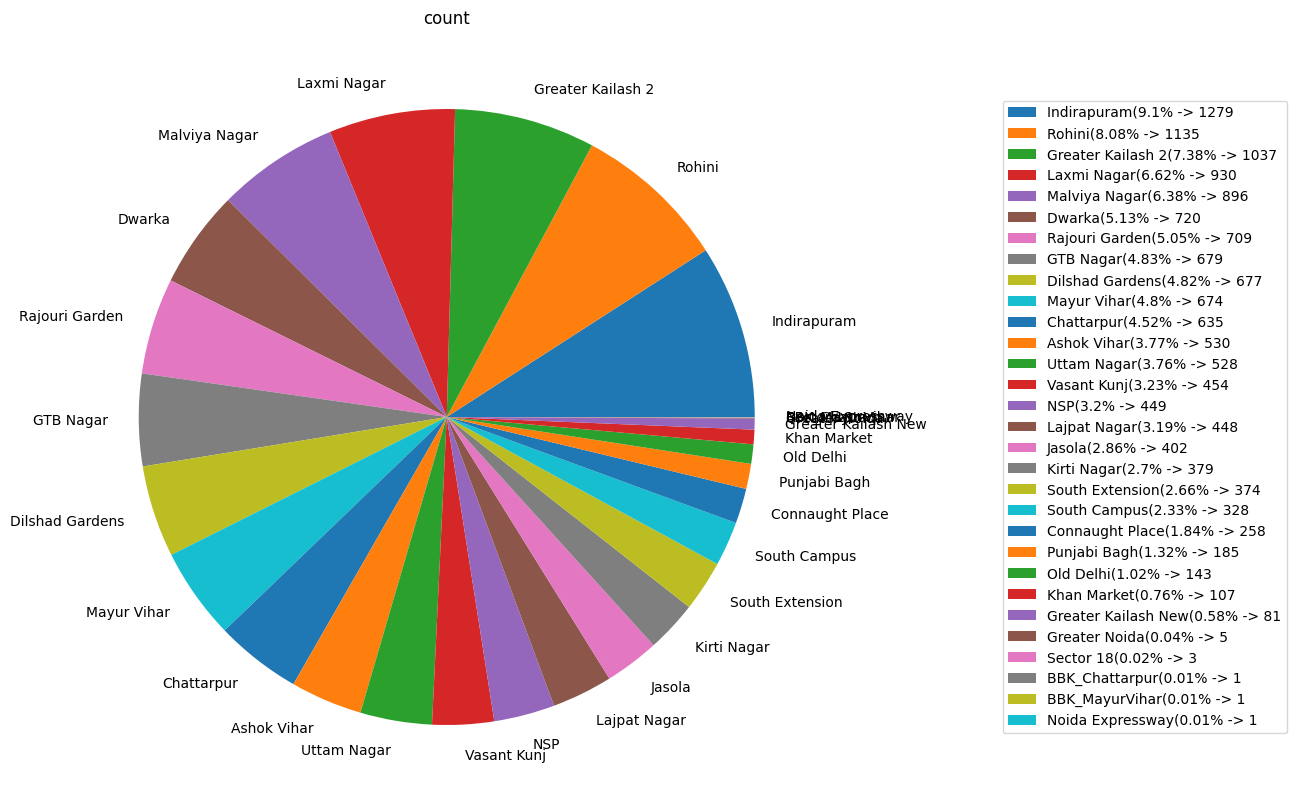

In [33]:
delhi = df3[df3['City'] == 'Delhi']
delhi1 =delhi.SubRegion.value_counts()
delhi1.sort_values(ascending = False)
plt.figure(figsize =(10,10))
plt.title("count")
plt.pie(delhi1,labels = delhi1.index)
count_percent = round((delhi1/delhi1.sum())* 100,2)
legend = delhi1.index + "(" + count_percent.values.astype(str) +"% -> " + delhi1.values.astype(str)
plt.legend(legend,loc = 'right',bbox_to_anchor = (1.6,0.5));

In [41]:
delhi = df3[df3['City'] == 'Delhi']
delhi1 =delhi.SubRegion.value_counts()
print("The Subregion of Delhi who have maximum number of restaurants listed on swiggy","\n",delhi1.sort_values(ascending = False).head(1))


The Subregion of Delhi who have maximum number of restaurants listed on swiggy 
 Indirapuram    1279
Name: SubRegion, dtype: int64


4. Name the top 5 Most Expensive Cities in the Datasets.



In [42]:
exp = df3.groupby('City',as_index = False).agg('mean')[['City','cost']].sort_values(by ='cost', ascending =False)
exp

<ipython-input-42-86882c435e20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exp = df3.groupby('City',as_index = False).agg('mean')[['City','cost']].sort_values(by ='cost', ascending =False)


,City,cost
216,Hinganghat,18962.437500
395,North-goa,468.964045
183,Gangtok,466.666667
362,Mussoorie,460.000000
492,South-goa,442.857143
...,...,...
20,Amreli,152.962963
235,Jalaun,150.000000
208,Hansi,148.421053
215,Hindaun,121.052632


As we can see in the above datasets city
 Hinganghat may have outliers in it.


<Axes: ylabel='cost'>

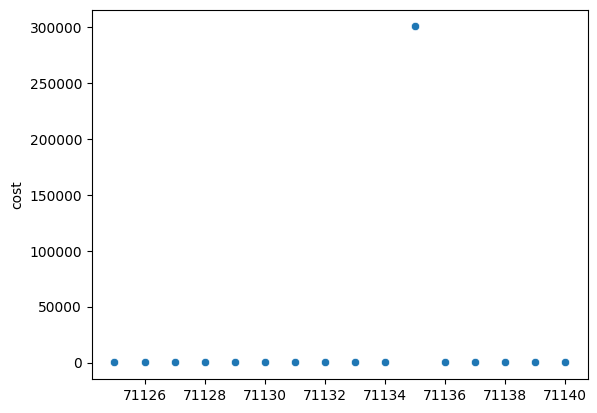

In [43]:
sns.scatterplot(data = df3[df3['City'] == 'Hinganghat']['cost'])

In [44]:
j = df3[df3.index == 71135].index
df3 = df3.drop(j)
df3[df3['City'] == 'Hinganghat']['cost']

71125    200
71126    250
71127    250
71128    300
71129    250
71130    150
71131    150
71132    200
71133    100
71134    300
71136    150
71137    200
71138    200
71139    150
71140    199
Name: cost, dtype: int64

<ipython-input-46-b8b4b492ac63>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exp = df3.groupby('City',as_index = False).agg('mean')[['City','cost']].sort_values(by ='cost', ascending =False)


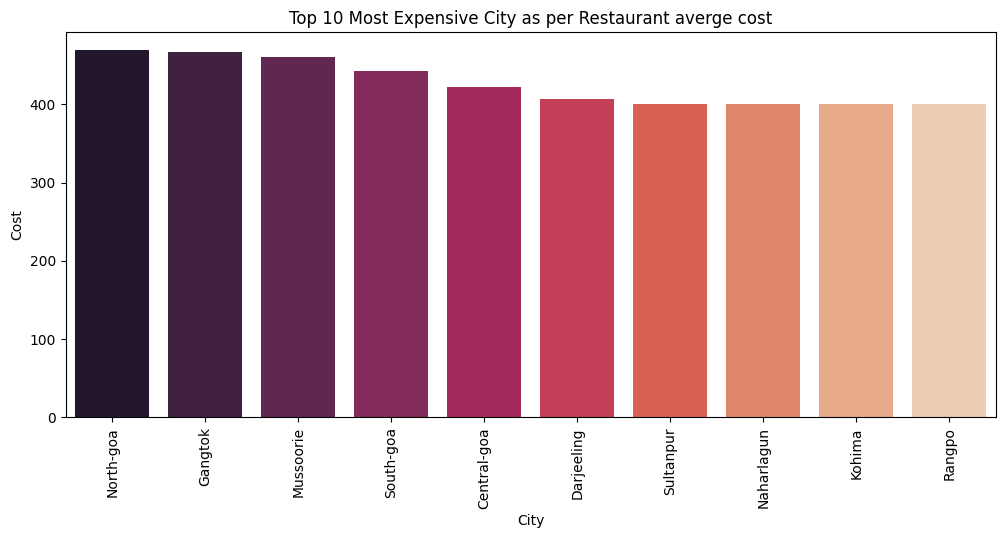

In [46]:
exp = df3.groupby('City',as_index = False).agg('mean')[['City','cost']].sort_values(by ='cost', ascending =False)

plt.figure(figsize =(12,5,))
sns.barplot(data = exp.head(10), x ='City',y ='cost',palette = 'rocket')
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Cost")
plt.title("Top 10 Most Expensive City as per Restaurant averge cost")
plt.show()

In [47]:
print('Top 10 Most Expensive City as per Restaurant averge cost :')
exp.head(5).style.background_gradient()

Top 10 Most Expensive City as per Restaurant averge cost :


,City,cost
395,North-goa,468.964045
183,Gangtok,466.666667
362,Mussoorie,460.000000
492,South-goa,442.857143
111,Central-goa,421.618812


5. List out the top 5 Restaurants with Maximum & minimum ratings throughout the dataset.

In [48]:
df3.rating.dtype
print(df3.shape[0])

148289


In [49]:
df3[df3.rating == df3.rating.max()][['Restaurant','rating']]

,Restaurant,rating
757,Pablo Premium Kitchen,5.0
1022,NH 2 DHABA,5.0
10962,Saiko Sushi House,5.0
11012,Olio - The Wood Fired Pizzeria,5.0
11444,Devil Station,5.0
...,...,...
134799,THE HEALTHY DHABA,5.0
142320,M Suchi Ruchi Fast Foods and Restaurant,5.0
143664,Galaxy Food Court,5.0
146602,MONI BOY KITCHEN,5.0


In [50]:
df5 = df3.dropna()


In [51]:
rat = df5.groupby('Restaurant',as_index = False).agg('max')[['Restaurant','rating']].sort_values(by ='rating', ascending =False)


In [52]:
print('Restaurant who have Maximun Rating :')
rat.head(5).style.background_gradient()

Restaurant who have Maximun Rating :


,Restaurant,rating
49771,ZYAKA PARATHA,5.000000
32871,Paris Waffle Co.,5.000000
42219,Suraj Poori Bhandar,5.000000
9189,Chai Chapter,5.000000
46160,The Pizza Delight,5.000000


In [53]:
print('Restaurant who have Minimum Rating :')
rat.tail(5)

Restaurant who have Minimum Rating :


,Restaurant,rating
7718,CHEF'S RESTAURANT,1.4
47589,Uddta punjaab,1.4
29622,NEW ZAIKA,1.2
40028,Shree ANNAPURNESHWARI FOODS,1.1
382,90DEGREES food court,1.0


6. Name of top 5 cities with the highest number of restaurants listed.

In [55]:
top = df3.City.value_counts(ascending = False).reset_index().rename({'index':'City','City':'Counts'},axis = 1)
print("Top 5 Cities wity the highest number of restaurants:")
top.head(5).style.background_gradient()

Top 5 Cities wity the highest number of restaurants:


,City,Counts
0,Bangalore,15288
1,Delhi,14048
2,Pune,12412
3,Hyderabad,9996
4,Chennai,9940


7. Top 10 cities as per the number of restaurants listed?

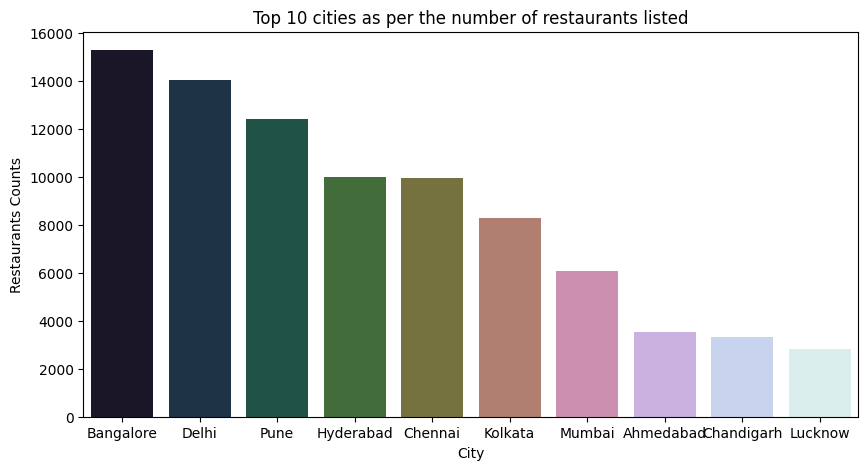

In [56]:
plt.figure(figsize= (10,5))
sns.barplot(data = top.head(10), x = 'City' , y = 'Counts', palette = "cubehelix")

plt.xlabel("City")
plt.ylabel("Restaurants Counts")
plt.title("Top 10 cities as per the number of restaurants listed")
plt.show()

8. Which restaurant in Pune has the most number of people visiting?

In [57]:
df2.rating_count.unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [58]:
RatingCount = {}
for rating in df2.rating_count.unique():
  if rating == 'Too Few Ratings':
    RatingCount[rating] = 0
  else:
    try:
      RatingCount[rating] = int(rating.split('+')[0])
    except:
      if rating.split('+')[0][-1] == 'K':
        RatingCount[rating] = int(rating.split('+')[0][:-1])*1000

RatingCount


{'Too Few Ratings': 0,
 '50+ ratings': 50,
 '100+ ratings': 100,
 '20+ ratings': 20,
 '500+ ratings': 500,
 '1K+ ratings': 1000,
 '5K+ ratings': 5000,
 '10K+ ratings': 10000}

In [59]:
ratingcounts = []
for i in range(df2.shape[0]):
    ratingcounts.append(RatingCount[df2.rating_count[i]])

print(df2.shape[0])

df2['ratingcounts'] = ratingcounts

148290


In [60]:
df7 = df2.sort_values(by = 'ratingcounts',ascending = False)
df7.head(2)

,id,Restaurant,rating,rating_count,cost,address,cuisine,lic_no,menu,link,City,SubRegion,ratingcounts
79198,40377,Lucky Restaurant,4.5,10K+ ratings,300,"Lucky Restaurant, H.No.17-1-375/26/A/4,D.M.R.L...","Biryani,Chinese",13621015000674,{'Recommended': {'Chicken Curry': {'price': '2...,https://www.swiggy.com/restaurants/lucky-resta...,Hyderabad,Santoshnagar & Saidabad,10000
73239,57903,Capital Multi Cuisine Restaurant,NaN,10K+ ratings,500,"Capital Multi Cuisine Restaurant, 16-2-741/D/7...","Biryani,Chinese",13618015000242,"{'Recommended': {'Firni': {'price': '105', 've...",https://www.swiggy.com/restaurants/capital-mul...,Hyderabad,Kothapet & Dilsukhnagar,10000


In [61]:
df6 = df7.dropna()
print('The Top 5 Most Popular Restaurants in Pune.')
df6[df6.City == 'Pune'].head(5).sort_values(by = 'ratingcounts',ascending =False)[['Restaurant','City','ratingcounts']].style.background_gradient()



The Top 5 Most Popular Restaurants in Pune.


,Restaurant,City,ratingcounts
128741,Burger King,Pune,1000
132396,Satguru's Punjabi Rasoi,Pune,1000
130033,Ashapuri Dining Hall,Pune,1000
128735,KFC,Pune,1000
124418,Taste Of Indore - Wakad,Pune,1000


9. Which SubRegion in Delhi is having the least expensive restaurant in terms of cost?

In [63]:
d = df6[df6.City == 'Delhi']
d.groupby('SubRegion')[['cost']]
print("Below Restaurants in Delhi having least expensive restaurant in terms of cost ")
d.head(5).sort_values(by = 'cost' , ascending = True)[['Restaurant','City','SubRegion','cost']].style.background_gradient()

Below Restaurants in Delhi having least expensive restaurant in terms of cost 


,Restaurant,City,SubRegion,cost
57829,CL Corner,Delhi,Kirti Nagar,200
52563,Nagpal Chholey Bhature (Ashok Vihar 1),Delhi,Ashok Vihar,200
58204,Haristo Pizzeria,Delhi,Indirapuram,300
49974,Burger King,Delhi,Laxmi Nagar,350
50119,Theobroma,Delhi,Laxmi Nagar,800


10. Top 5 most popular restaurant chains in India?

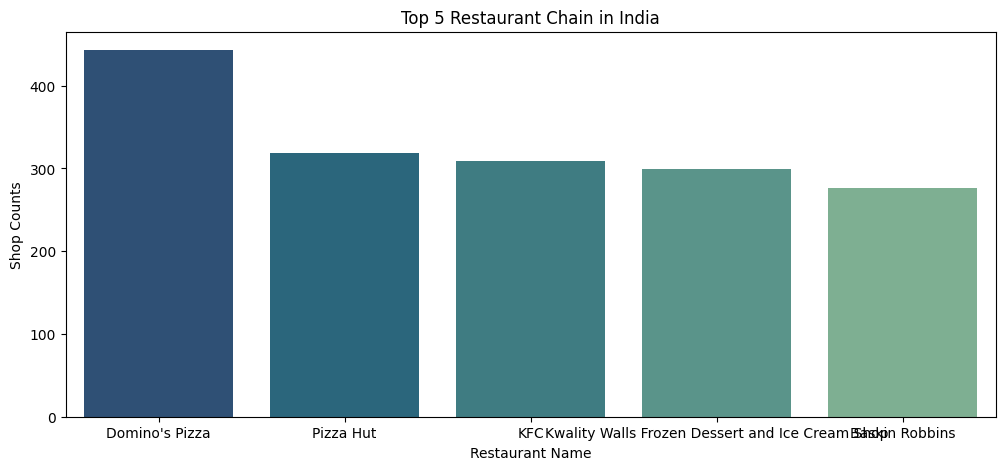

In [64]:
d1 = df3.groupby('Restaurant', as_index=False).agg('count')[['Restaurant', 'id']].sort_values(by='id', ascending = False)


plt.figure(figsize=(12,5))

sns.barplot(data = d1.head(),x='Restaurant',y = 'id',palette= "crest_r")

plt.xlabel("Restaurant Name")
plt.ylabel("Shop Counts")
plt.title('Top 5 Restaurant Chain in India')
plt.show()


In [65]:
print('Top 5 most popular restaurant chains in India')
d1.head(5).style.background_gradient()

Top 5 most popular restaurant chains in India


,Restaurant,id
28539,Domino's Pizza,443
73611,Pizza Hut,319
49040,KFC,309
53383,Kwality Walls Frozen Dessert and Ice Cream Shop,299
11753,Baskin Robbins,276


11. Name the top 5 Most Popular Restaurants in Pune.

In [66]:
d = df7.sort_values(by = 'ratingcounts', ascending=False)[['Restaurant', 'SubRegion', 'City', 'rating_count','ratingcounts']]
d[d.City == 'Pune'].head(10).style.background_gradient()

,Restaurant,SubRegion,City,rating_count,ratingcounts
122774,Chinese Wok (Wok Express),Kothrud,Pune,1K+ ratings,1000
124993,Irani cafe,Kondhwa,Pune,1K+ ratings,1000
132818,Apna Punjab,Magarpatta,Pune,1K+ ratings,1000
121982,FRIED CHICKEN DESTINATION,Kothrud,Pune,1K+ ratings,1000
130626,McDonald's,Kharadi,Pune,1K+ ratings,1000
125006,Mad Momos,Kondhwa,Pune,1K+ ratings,1000
125009,Filli Bites,Kondhwa,Pune,1K+ ratings,1000
122757,SINGH SAAB,Kothrud,Pune,1K+ ratings,1000
124936,Apricot Veg,Wakad,Pune,1K+ ratings,1000
124940,McDonald's,Kondhwa,Pune,1K+ ratings,1000


12. Top 10 Restaurants with Maximum Ratings in Banglore

In [67]:
dt = df3[df3.City == 'Bangalore']
dt.sort_values(by = 'rating',ascending = False)[['Restaurant','rating','City','SubRegion']].head(10).style.background_gradient()


,Restaurant,rating,City,SubRegion
23184,A2B Veg,5.000000,Bangalore,Shantinagar
13101,Sugar Cane Fresh,5.000000,Bangalore,Indiranagar
14479,The Bowl Company,5.000000,Bangalore,Whitefield
20091,Noto Healthy Ice Cream,5.000000,Bangalore,Marathahalli
11894,HRX by Eatfit,5.000000,Bangalore,HSR
14452,Chaat Street,5.000000,Bangalore,Whitefield
14447,HOPSHAUS,5.000000,Bangalore,Whitefield
11012,Olio - The Wood Fired Pizzeria,5.000000,Bangalore,Mahadevpura
20780,Official Hideout,5.000000,Bangalore,Rajarajeshwari Nagar
14832,GOWDRU HOTEL,5.000000,Bangalore,Whitefield


13. Top 10 Restaurant in Patna w.r.t rating

In [69]:
dt = df3[df3.City == 'Patna']
dt.sort_values(by = 'rating',ascending = False)[['Restaurant','rating','City','SubRegion']].head(10).style.background_gradient()


,Restaurant,rating,City,SubRegion
119281,Mr and Mrs vada,4.800000,Patna,Patna
119672,The Cake Delivery,4.700000,Patna,Patna
119561,Shri Ganpati the Food Garaje,4.600000,Patna,Patna
119468,Food Mohalla,4.600000,Patna,Patna
119273,Sayeshaa Restro & Cafe,4.500000,Patna,Patna
119812,Yash Kirti Restraunt,4.500000,Patna,Patna
119526,WOK DYNASTY,4.500000,Patna,Patna
119433,Biryani By Bihari's,4.500000,Patna,Patna
119721,The Red Chilli,4.500000,Patna,Patna
119738,Tandoori Dhaba,4.400000,Patna,Patna
